In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [81]:
df.drop(df.columns[[1, 2, 8]], axis=1, inplace=True)

In [82]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [83]:
df.head()

,age,t_stage_,n_stage,6th_stage,differentiate,grade,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
0,68,T1,N1,IIA,Poorly differentiated,3,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,41,Positive,Positive,3,1,50,Alive


In [84]:
df['status'] = (df['status']=='Dead').astype(int)

In [85]:
df.head()

,age,t_stage_,n_stage,6th_stage,differentiate,grade,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
0,68,T1,N1,IIA,Poorly differentiated,3,4,Positive,Positive,24,1,60,0
1,50,T2,N2,IIIA,Moderately differentiated,2,35,Positive,Positive,14,5,62,0
2,58,T3,N3,IIIC,Moderately differentiated,2,63,Positive,Positive,14,7,75,0
3,58,T1,N1,IIA,Poorly differentiated,3,18,Positive,Positive,2,1,84,0
4,47,T2,N1,IIB,Poorly differentiated,3,41,Positive,Positive,3,1,50,0


In [86]:
from sklearn.model_selection import train_test_split



In [87]:
categorical = list(df.dtypes[df.dtypes=='object'].index)
numerical = list(df.dtypes[df.dtypes!='object'].index)

In [88]:
numerical.remove('status')

In [90]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(2414, 805, 805)

In [91]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [92]:
y_train = df_train.status.values
y_val = df_val.status.values
y_test = df_test.status.values

In [93]:
del df_train['status']
del df_val['status']
del df_test['status'] 

In [94]:
df_full_train.head()

,age,t_stage_,n_stage,6th_stage,differentiate,grade,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
3673,47,T3,N1,IIIA,Poorly differentiated,3,51,Positive,Negative,17,1,78,0
2644,67,T2,N3,IIIC,Poorly differentiated,3,50,Positive,Positive,12,10,10,1
2576,47,T2,N2,IIIA,Moderately differentiated,2,50,Positive,Positive,12,7,71,0
2159,60,T2,N1,IIB,Poorly differentiated,3,35,Positive,Positive,37,2,54,0
2712,55,T4,N3,IIIC,Poorly differentiated,3,40,Positive,Negative,12,12,82,1


In [95]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [97]:
def train(df_train, y_train, C):
    
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
 
    return dv, model

In [98]:
def predict(df, dv, model):
     dicts = df[categorical + numerical].to_dict(orient='records')
 
     X = dv.fit_transform(dicts)
     y_pred = model.predict_proba(X)[:,1]
 
     return y_pred

In [99]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.status.values
        y_val = df_val.status.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:00<00:01,  3.52it/s]

C=0.001 0.859 +- 0.012


 29%|██▊       | 2/7 [00:00<00:01,  3.36it/s]

C=0.01 0.864 +- 0.010


 43%|████▎     | 3/7 [00:00<00:01,  3.22it/s]

C=0.1 0.867 +- 0.010


 57%|█████▋    | 4/7 [00:01<00:00,  3.20it/s]

C=0.5 0.867 +- 0.012


 71%|███████▏  | 5/7 [00:01<00:00,  3.10it/s]

C=1 0.868 +- 0.012


 86%|████████▌ | 6/7 [00:01<00:00,  3.13it/s]

C=5 0.868 +- 0.012


100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

C=10 0.868 +- 0.012


In [100]:
scores

[0.8703249273394943,
 0.8489255480790102,
 0.879548200859291,
 0.8592458884877658,
 0.8808674985145573]

In [101]:
#C=1 gives us the best result and with scores we see the values are pretty consistent so this model is not overfitting

In [102]:
#train final logistic regression, auc as metric since dataset is imbalanced
dv, model = train(df_full_train, df_full_train.status.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8455745404486195

In [103]:
#We will now check random forest and xgboost
from sklearn.ensemble import RandomForestClassifier

In [112]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [113]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [116]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [117]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

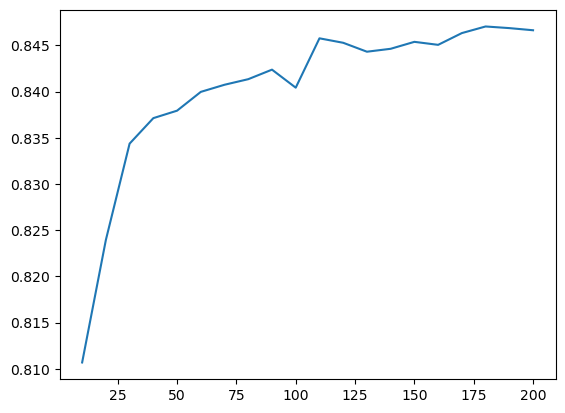

In [118]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

In [119]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [120]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

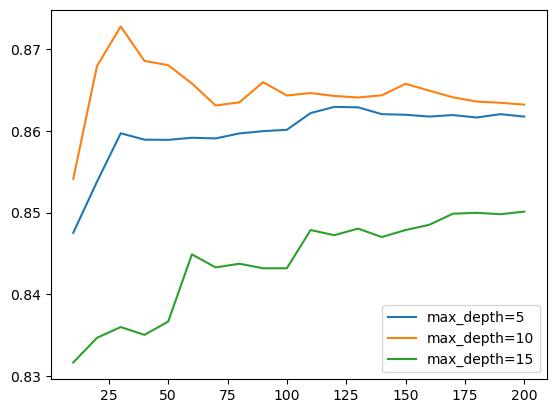

In [121]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [122]:
max_depth = 10

In [123]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [124]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

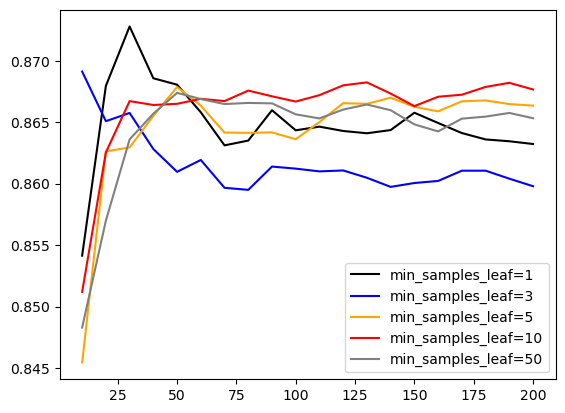

In [125]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [126]:
min_samples_leaf = 10

In [127]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       random_state=1)

In [128]:
#XGBoost
import xgboost as xgb

In [129]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [130]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [131]:
y_pred = model.predict(dval)

In [132]:
roc_auc_score(y_val, y_pred)

0.8925653594771241

In [ ]:
#we will not tune xgb params for the lack of time

In [140]:
#comparing the 3 model:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.859792780748663

In [146]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8925653594771241

In [148]:

model = LogisticRegression(solver='liblinear', C=1, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8806818181818182

In [ ]:
#xgboost is negligubly better than logistic regression but since we tuned LR we will use that model instead

In [149]:
df_full_train = df_full_train.reset_index(drop=True)

In [150]:
y_full_train = df_full_train.status.values

In [151]:
del df_full_train['status']

In [155]:
dv, model = train(df_full_train, y_full_train, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8455745404486195

In [156]:
import pickle

In [157]:
with open('model.bin', 'wb') as f:
    pickle.dump((model, dv), f)